In [1]:
import numpy as np
import merg_rates
from wetzel_utils.utility.utility_catalog import indices_tree

In [24]:
import matplotlib as mpl 
mpl.use('Agg')
import matplotlib.pyplot as plt 
from matplotlib import rcParams
%matplotlib inline

rcParams['mathtext.fontset'] = 'dejavuserif'
rcParams['font.family'] = 'serif' 
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.grid']=True
rcParams['axes.titlesize']=24
rcParams['axes.labelsize']=20
rcParams['axes.titlepad']=15
rcParams['legend.frameon'] = True
rcParams['legend.facecolor']='white'
rcParams['legend.fontsize']=18

# $\S$ 1

In [2]:
#reload(merg_rates)
tpm=merg_rates.shamedTreepmClass(0.2,seed=1,catkind='host')
tpm.merg_tree(0,34,typ='host')

# in merg_rates.shamedTreepm():
  read /data1/arwetzel/lcdm250/snapshot.txt
  read  3914367 halo from halo_tree_00.dat
  read  3939586 halo from halo_tree_01.dat
  read  3964156 halo from halo_tree_02.dat
  read  3991148 halo from halo_tree_03.dat
  read  4017802 halo from halo_tree_04.dat
  read  4043082 halo from halo_tree_05.dat
  read  4068695 halo from halo_tree_06.dat
  read  4091273 halo from halo_tree_07.dat
  read  4114245 halo from halo_tree_08.dat
  read  4134906 halo from halo_tree_09.dat
  read  4156401 halo from halo_tree_10.dat
  read  4175240 halo from halo_tree_11.dat
  read  4191460 halo from halo_tree_12.dat
  read  4201253 halo from halo_tree_13.dat
  read  4207986 halo from halo_tree_14.dat
  read  4208029 halo from halo_tree_15.dat
  read  4202839 halo from halo_tree_16.dat
  read  4189843 halo from halo_tree_17.dat
  read  4168435 halo from halo_tree_18.dat
  read  4135114 halo from halo_tree_19.dat
  read  4092177 halo from halo_tree_20.dat
  read  4036281 halo 

In [21]:
M0=12.
Mwid=0.5
allM0s=tpm.hostcat[0][tpm.hmtype]
inrange=(allM0s<M0+Mwid/2.) & (allM0s>M0-Mwid/2.)
hi0s=np.arange(len(allM0s))[inrange]

allzis=np.arange(35)
mzM0s=[]

for hi0 in hi0s:
    M0=tpm.hostcat[0][tpm.hmtype][hi0]
    for zi in allzis[1:]:
        #print'zi: %d'%zi
        #print'hi0: %d'%hi0
        if hi0 in tpm.hostcat[zi]['merg.branch']:
            merg_is=tpm.hostcat[zi]['merg.branch'][hi0]
        else:
            continue
        #print merg_is
        ms=tpm.hostcat[zi][tpm.hmtype][merg_is]
        mzM0s_add=list(ms-M0)
        mzM0s+=mzM0s_add

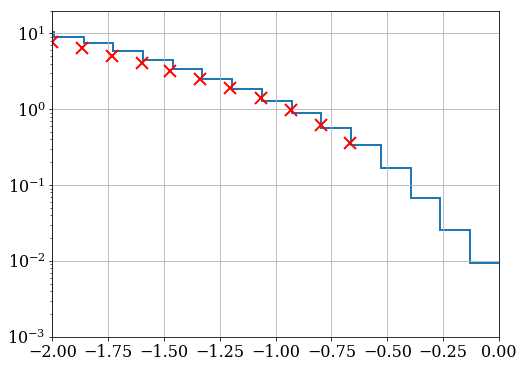

In [30]:
midbins_s_12,N_gmratio_s_12=np.loadtxt('dat/stewart12m_M0.csv',
                                       delimiter=',',
                                       unpack=True)
midbins_s_13,N_gmratio_s_13=np.loadtxt('dat/stewart13m_M0.csv',
                                       delimiter=',',
                                       unpack=True)

fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.hist(mzM0s,bins=50,cumulative=-1,histtype='step',lw=2,
        weights=np.repeat(1./float(sum(inrange)),len(mzM0s)))
ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'x',mec='r',mfc='None',
          ms=12,mew=2,)
ax.set_xlim(-2,0)
ax.set_ylim(1e-3,2e1)
ax.set_yscale('log')
plt.show()

# Testing Subhalo and Galaxy Merger Tree

In [31]:
tpm.merg_tree(typ='subhal')

  read /data1/arwetzel/lcdm250/snapshot.txt
  read  5177765 subhalo from subhalo_tree_00.dat
  read  5407196 subhalo from subhalo_tree_01.dat
  read  5485481 subhalo from subhalo_tree_02.dat
  read  5517336 subhalo from subhalo_tree_03.dat
  read  5548084 subhalo from subhalo_tree_04.dat
  read  5583078 subhalo from subhalo_tree_05.dat
  read  5615345 subhalo from subhalo_tree_06.dat
  read  5650410 subhalo from subhalo_tree_07.dat
  read  5682696 subhalo from subhalo_tree_08.dat
  read  5715688 subhalo from subhalo_tree_09.dat
  read  5748795 subhalo from subhalo_tree_10.dat
  read  5779167 subhalo from subhalo_tree_11.dat
  read  5805949 subhalo from subhalo_tree_12.dat
  read  5824060 subhalo from subhalo_tree_13.dat
  read  5837797 subhalo from subhalo_tree_14.dat
  read  5841491 subhalo from subhalo_tree_15.dat
  read  5836226 subhalo from subhalo_tree_16.dat
  read  5823060 subhalo from subhalo_tree_17.dat
  read  5795900 subhalo from subhalo_tree_18.dat
  read  5753867 subhalo f

In [56]:
def Nmu(M0,cat,typ,ziend=34,through=False):
    #Plots the cumulative number of mergers per 
    #halo/galaxy, N(>mu), where mu is m_z/M_z
    Mwid=0.5
    if typ=='gal':
        mtype=tpm.gmtype
        brstr='gal.merg.branch'
    elif typ=='subhal':
        mtype=tpm.smtype
        brstr='sub.merg.branch'
    elif typ=='host':
        mtype=tpm.hmtype
        brstr='merg.branch'
    allM0s=cat[0][mtype]
    inrange=(allM0s<M0+Mwid/2.) & (allM0s>M0-Mwid/2.)
    hi0s=np.arange(len(allM0s))[inrange]
    
    if through:
        #take only main progenitors that exist at ziend                        
        hiends=indices_tree(cat,0,ziend,hi0s)                                  
        goesthrough=hiends>=0                                                  
        hi0s=hi0s[goesthrough]
        hiends=hiends[goesthrough]
        #take only main progenitors whose mass is not nan at
        #ziend
        msend=cat[ziend][mtype][hiends]
        notnan=~np.isnan(msend)
        hi0s=hi0s[notnan]
        hiends=hiends[notnan]
        msend=msend[notnan]
        #take only main progenitors that have non-zero mass at
        #ziend                                  
        pos_msend=msend>0.                                                     
        hi0s=hi0s[pos_msend]             
    
    allzis=np.arange(ziend+1)
    mzM0s=[]

    for hi0 in hi0s:
        M0=cat[0][mtype][hi0]
        for zi in allzis[1:]:
            if hi0 in cat[zi][brstr]:
                merg_is=cat[zi][brstr][hi0]
            else:
                continue
            ms=cat[zi][mtype][merg_is]
            mzM0s_add=list(ms-M0)
            mzM0s+=mzM0s_add
    
    fig=plt.figure(figsize=(8,6))
    ax=fig.add_subplot(111)
    ax.hist(mzM0s,bins=50,cumulative=-1,histtype='step',lw=2,
            weights=np.repeat(1./len(hi0s),len(mzM0s)))
    ax.plot(np.log10(midbins_s_12),N_gmratio_s_12,'x',mec='r',
            mfc='None',
              ms=12,mew=2,)
    ax.set_xlim(-3,0)
    ax.set_ylim(1e-3,2e1)
    ax.set_yscale('log')
    plt.show()

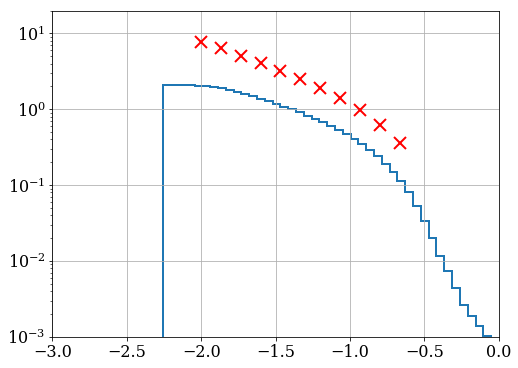

In [57]:
Nmu(12.,tpm.subcat,'subhal',through=True)

2906961 galaxies in snapshot 33
3267446 galaxies in snapshot 32
3591830 galaxies in snapshot 31
3901457 galaxies in snapshot 30
4187628 galaxies in snapshot 29
4451504 galaxies in snapshot 28
4697199 galaxies in snapshot 27
4914942 galaxies in snapshot 26
5105362 galaxies in snapshot 25
5270374 galaxies in snapshot 24
5409626 galaxies in snapshot 23
5527314 galaxies in snapshot 22
5620673 galaxies in snapshot 21
5697344 galaxies in snapshot 20
5753867 galaxies in snapshot 19
5795900 galaxies in snapshot 18
5823060 galaxies in snapshot 17
5836226 galaxies in snapshot 16
5841491 galaxies in snapshot 15
5837797 galaxies in snapshot 14
5824060 galaxies in snapshot 13
5805949 galaxies in snapshot 12
5779167 galaxies in snapshot 11
5748795 galaxies in snapshot 10
5715688 galaxies in snapshot 9
5682696 galaxies in snapshot 8
5650410 galaxies in snapshot 7
5615345 galaxies in snapshot 6
5583078 galaxies in snapshot 5
5548084 galaxies in snapshot 4
5517336 galaxies in snapshot 3
5485481 galaxie

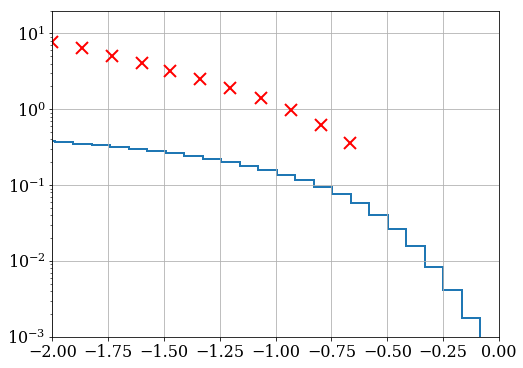

In [40]:
tpm.merg_tree(typ='gal',ziend=33)

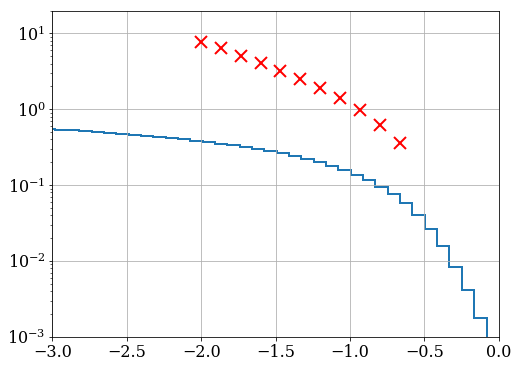

In [58]:
Nmu(10.5,tpm.subcat,'gal',ziend=33,through=False)

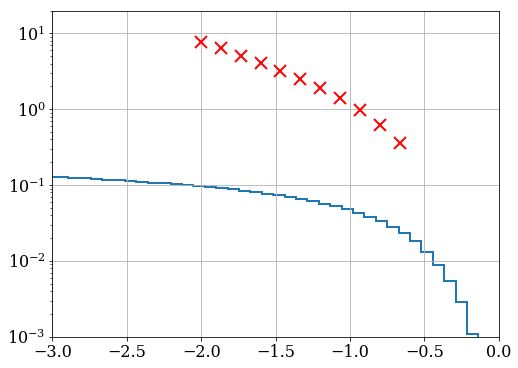

In [59]:
Nmu(10.5,tpm.subcat,'gal',ziend=33,through=True)

# Testing python functionality

In [ ]:
zis=np.arange(35)
zis_use=zis[:0:-1]
print zis_use

In [ ]:
i0s=np.arange(len(tpm.subcat[0][tpm.gmtype]))
paris1=indices_tree(tpm.subcat,0,34)
paris2=indices_tree(tpm.subcat,0,34,i0s)
np.array_equal(paris1,paris2)

In [ ]:
parbranch={}
for i0,pari1 in zip(i0s,paris1):
    parbranch[i0]=pari1
parbranch_prox=parbranch
parbranch_prox[0]='foo'
parbranch